In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("./Heart_Disease_Data.csv",na_values="?")
data.sample(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
80,45,1,4,104,208,0,2,148,1,3.0,2,0.0,3.0,0
290,67,1,3,152,212,0,2,150,0,0.8,2,0.0,7.0,1
280,57,1,4,110,335,0,0,143,1,3.0,2,1.0,7.0,2
203,64,0,3,140,313,0,0,133,0,0.2,1,0.0,7.0,0


In [3]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


pred_attribute is the one that says if the individual has a heart disease,<br>
for value >=1 we say that he has one<br>
So let's change all the values >=1 to 1.<br>
<br>
In this notebook we're trying to see if we can predict the pred_attribute.

In [4]:
data["pred_attribute"].replace(inplace=True, value=[1, 1, 1, 1], to_replace=[1, 2, 3, 4])

In [5]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
273,71,0,4,112,149,0,0,125,0,1.6,2,0.0,3.0,0
35,42,1,4,140,226,0,0,178,0,0.0,1,0.0,3.0,0
241,41,0,2,126,306,0,0,163,0,0.0,1,0.0,3.0,0
215,56,1,1,120,193,0,2,162,0,1.9,2,0.0,7.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


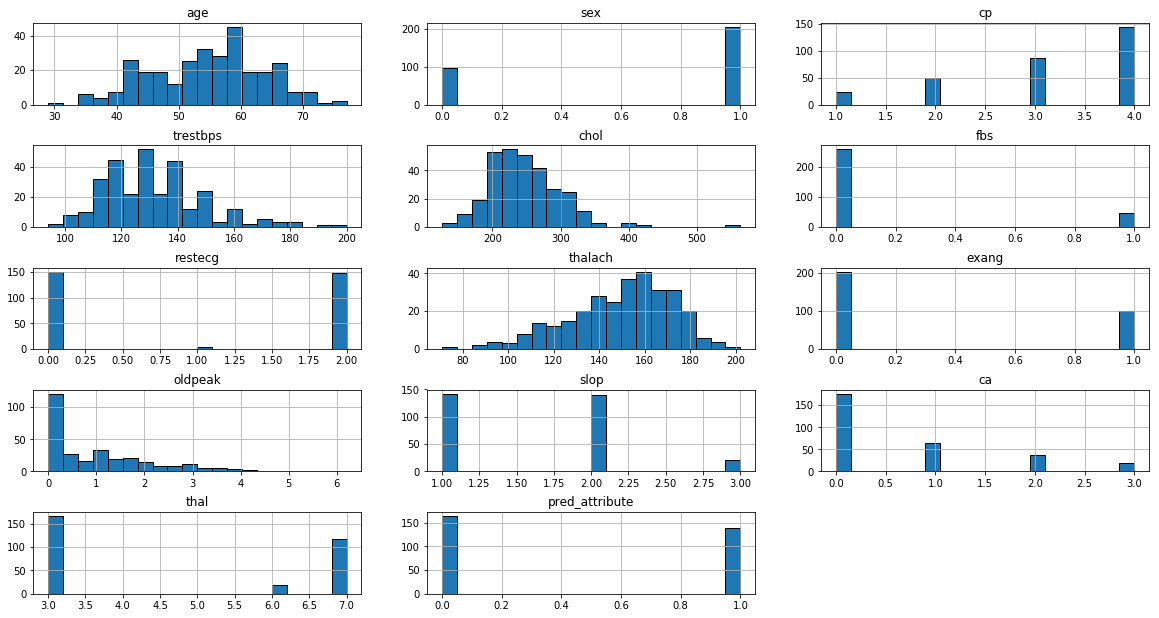

In [6]:
columns=data.columns[:14]
plt.subplots(figsize=(20,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()
 

**Impute missing values**

In [7]:
# Check nan values
data[data.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [8]:
# Replace missing data by the median
data = data.fillna(data.median())

# Separate into features and results
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [9]:
y.head(5)

0    0
1    1
2    1
3    0
4    0
Name: pred_attribute, dtype: int64

In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
# Data Standardization only on the training set
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pd.DataFrame(X_test,columns=data.columns[:-1]).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
0,-1.266193,0.715891,0.861173,-1.212316,-0.706137,-0.411196,-0.953596,0.495005,-0.715891,-0.923939,-0.996355,-0.699643,1.164514
1,1.502318,0.715891,-0.207565,-0.764749,0.521246,-0.411196,-0.953596,0.045844,-0.715891,-0.058640,-0.996355,0.385701,1.164514
2,0.505654,0.715891,0.861173,0.354170,0.409665,-0.411196,1.061864,1.438244,-0.715891,-0.923939,-0.996355,-0.699643,-0.892511
3,1.059356,0.715891,0.861173,0.745792,-0.687540,-0.411196,1.061864,-0.807562,-0.715891,0.806659,0.678075,1.471044,0.650258
4,0.616394,-1.396861,0.861173,1.473089,1.041953,-0.411196,1.061864,0.495005,-0.715891,-0.923939,-0.996355,-0.699643,-0.892511


### A Look at the training test split

In [12]:
overview = pd.DataFrame({"Training dataset": y_train.sum(),
                      "Test dataset":y_test.sum()
                      },
                     index=["Healthy", "Sick"])
overview[["Training dataset", "Test dataset"]]
overview.iloc[0,0] = y_train.shape[0] -y_train.sum()
overview.iloc[0,1] = y_test.shape[0] -y_test.sum()
overview['total'] = overview['Training dataset'] + overview['Test dataset']
overview.loc['total'] =overview.loc['Healthy'] + overview.loc['Sick']
overview

,Training dataset,Test dataset,total
Healthy,130,34,164
Sick,112,27,139
total,242,61,303


### Apply machine learning algorithms
#### Logistic Regression

In [13]:
model = LogisticRegression(random_state = 1)
model.fit(X_train, y_train)

# check the accuracy on the training set
print("Accuracy on training set: ", model.score(X_train, y_train))
# check the accuracy on the test set
print("Accuracy on test set: ", model.score(X_test, y_test))

Accuracy on training set:  0.871900826446281
Accuracy on test set:  0.8360655737704918


**Logistic Regression gives us a 83.6% accuracy**